In [1]:
import numpy as np

x_train = np.load("x_train.npy")
print(x_train.shape)

(71, 13, 938)


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras import Model

import tensorflow as tf


class AE(Model):
    def __init__(self, latent_dim, input_shape, **kwargs):
        super(AE, self).__init__(**kwargs)

        self.latent_dim = latent_dim
        self.input_shape = input_shape

        self.encoder = Encoder(input_shape=input_shape, latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim)

    def call(self, inputs):
        z = self.encoder(inputs)

        reconstructions = self.decoder(z)
        return reconstructions

    def compute_loss(self, x, y):
        x_recon = self.call(x)
        reconstruction_loss = tf.reduce_mean(tf.square(y - x_recon))
        return reconstruction_loss

    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            loss = self.compute_loss(x, y)
            total_loss = loss

        trainable = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable)
        self.optimizer.apply_gradients(zip(gradients, trainable))

        return {"loss": loss}


def Encoder(input_shape, latent_dim):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(128, 2, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling1D(2, padding="same")(x)
    x = layers.Conv1D(64, 3, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling1D(2, padding="same")(x)
    x = layers.Conv1D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(2, padding="same")(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(latent_dim)(x)
    return Model(inputs, outputs, name="Encoder")


def Decoder(latent_dim):
    inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(13 * 16)(inputs)
    x = layers.Reshape((13, 16))(x)
    x = layers.Conv1DTranspose(32, 2, padding="same", activation="relu")(x)
    x = layers.Conv1DTranspose(64, 3, padding="same", activation="relu")(x)
    x = layers.Conv1DTranspose(128, 3, padding="same", activation="relu")(x)
    x = layers.Conv1DTranspose(1, 3, padding="same", activation="tanh")(x)
    return Model(inputs, x, name="Decoder")


model = AE(2, x_train.shape[1:])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001))

model.fit(x_train, x_train, epochs=500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0180
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0180
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0169
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0149
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0102
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 
Epoch 16/500
3/3 ━━

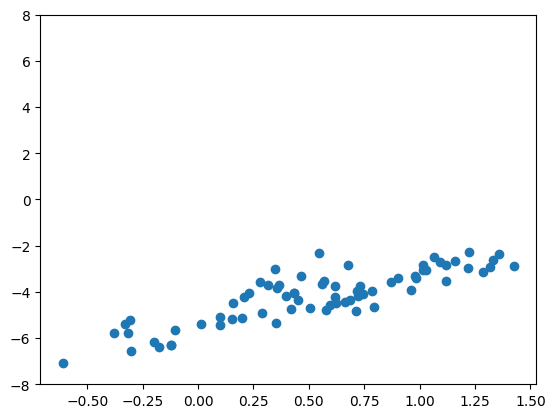

In [13]:
z = model.encoder(x_train)
# embeddings = np.array(model.vector_quantizer.embeddings)

import matplotlib.pyplot as plt

plt.scatter(z[:, 0], z[:, 1])
plt.ylim(-8, 8)
# plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.show()